In [1]:
#Instalação de bibliotecas necessárias

!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00

In [2]:
#transformação de dados de csv para DataFrame

import pandas as pd

data = []
for i in range(1, 6):
    df = pd.read_csv(f'/content/teste_mesa{i}.csv')
    df['local'] = i
    data.append(df)

merged_data = pd.concat(data, ignore_index=True)

merged_data

,Geral,local
0,:Inteli-COLLEGE-38FC:5C:45:00:5F:D8SHOW:Inteli...,1
1,:Inteli-COLLEGE-44FC:5C:45:00:5F:D8SHOW:Inteli...,1
2,:Inteli-COLLEGE-45FC:5C:45:00:5F:D8SHOW:Inteli...,1
3,:Inteli-COLLEGE-44FC:5C:45:00:5F:D8SHOW:Inteli...,1
4,:Inteli-COLLEGE-44FC:5C:45:00:5F:D8SHOW:Inteli...,1
...,...,...
525,:DIRECT-1CJ95EBB404C9GOi_-4952:57:9C:C0:46:1CS...,5
526,:DIRECT-1CJ95EBB404C9GOi_-4952:57:9C:C0:46:1CS...,5
527,:DIRECT-1CJ95EBB404C9GOi_-5252:57:9C:C0:46:1CS...,5
528,:DIRECT-1CJ95EBB404C9GOi_-5152:57:9C:C0:46:1CS...,5


In [5]:
#Formatação adequada da string recebida no serial do esp32

df = pd.DataFrame()

stringDividida = merged_data.iloc[0]['Geral'].split("SHOW")
for stringSingle in stringDividida:
  for stringSingleInside in stringSingle.split("-"):
    try:
      if isinstance(int(stringSingleInside[0:2]), int):
          df.at[0 ,f'{stringSingleInside[2:]}'] = stringSingleInside[0:2]
    except ValueError:
        pass

for line in range(1, len(merged_data)):
  df_append = pd.DataFrame()

  stringDividida = merged_data.iloc[line]['Geral'].split("SHOW")
  for stringSingle in stringDividida:
    for stringSingleInside in stringSingle.split("-"):
      try:
        if isinstance(int(stringSingleInside[0:2]), int):
          if stringSingleInside[2:] in list(df.columns):
            df_append.at[0 ,f'{stringSingleInside[2:]}'] = stringSingleInside[0:2]
      except ValueError:
          pass

  df = pd.concat([df, df_append], ignore_index=True)
  df = df.fillna(0)

df['local'] = merged_data['local']
df = df.astype(float)
df

,FC:5C:45:00:5F:D8,FC:5C:45:C0:5F:D8,FC:5C:45:C0:5F:D9,52:57:9C:C0:46:1C,FC:5C:45:00:68:68,FC:5C:45:C0:68:68,FC:5C:45:C0:68:69,FC:5C:45:00:55:18,FC:5C:45:C0:55:18,FC:5C:45:00:55:1A,...,FC:5C:45:80:5C:F8,FC:5C:45:00:5C:FA,FC:5C:45:C0:5F:B9,FC:5C:45:C0:53:98,FC:5C:45:C0:53:99,FC:5C:45:00:5F:B8,74:4C:A1:5A:B3:31,3A:1A:52:EA:A3:FC,DE:03:98:3A:41:69,local
0,38.0,39.0,39.0,57.0,67.0,67.0,67.0,71.0,71.0,71.0,...,86.0,86.0,90.0,90.0,90.0,91.0,92.0,92.0,92.0,1.0
1,44.0,44.0,44.0,47.0,70.0,71.0,70.0,72.0,71.0,71.0,...,0.0,0.0,88.0,84.0,84.0,87.0,0.0,0.0,0.0,1.0
2,45.0,45.0,46.0,48.0,73.0,73.0,73.0,72.0,73.0,73.0,...,0.0,0.0,88.0,88.0,88.0,88.0,0.0,0.0,0.0,1.0
3,44.0,44.0,45.0,48.0,72.0,73.0,73.0,71.0,71.0,71.0,...,0.0,0.0,87.0,85.0,86.0,87.0,0.0,0.0,0.0,1.0
4,44.0,44.0,44.0,49.0,71.0,72.0,72.0,70.0,70.0,71.0,...,89.0,0.0,89.0,85.0,85.0,88.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,52.0,53.0,52.0,49.0,71.0,71.0,71.0,74.0,75.0,75.0,...,88.0,86.0,87.0,78.0,77.0,0.0,91.0,0.0,0.0,5.0
526,53.0,54.0,53.0,49.0,69.0,69.0,69.0,75.0,75.0,75.0,...,88.0,88.0,86.0,80.0,80.0,87.0,93.0,0.0,0.0,5.0
527,52.0,52.0,52.0,52.0,68.0,68.0,68.0,75.0,75.0,75.0,...,85.0,86.0,88.0,78.0,79.0,87.0,92.0,0.0,0.0,5.0
528,55.0,55.0,55.0,51.0,66.0,66.0,66.0,76.0,77.0,78.0,...,86.0,87.0,88.0,79.0,78.0,87.0,0.0,0.0,0.0,5.0


In [6]:
# Comparação de modelos de classificação
import numpy as np

df2 = df.copy()

for i in list(df.columns):
  df2[f'distance_{i}'] = np.power(10, (df[f'{i}'].iloc[0] - df[f'{i}']) / (10 * 2.4))

df2

,FC:5C:45:00:5F:D8,FC:5C:45:C0:5F:D8,FC:5C:45:C0:5F:D9,52:57:9C:C0:46:1C,FC:5C:45:00:68:68,FC:5C:45:C0:68:68,FC:5C:45:C0:68:69,FC:5C:45:00:55:18,FC:5C:45:C0:55:18,FC:5C:45:00:55:1A,...,distance_FC:5C:45:80:5C:F8,distance_FC:5C:45:00:5C:FA,distance_FC:5C:45:C0:5F:B9,distance_FC:5C:45:C0:53:98,distance_FC:5C:45:C0:53:99,distance_FC:5C:45:00:5F:B8,distance_74:4C:A1:5A:B3:31,distance_3A:1A:52:EA:A3:FC,distance_DE:03:98:3A:41:69,distance_local
0,38.0,39.0,39.0,57.0,67.0,67.0,67.0,71.0,71.0,71.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,44.0,44.0,44.0,47.0,70.0,71.0,70.0,72.0,71.0,71.0,...,3831.186850,3831.186850,1.211528,1.778279,1.778279,1.467799,6812.920691,6812.920691,6812.920691,1.000000
2,45.0,45.0,46.0,48.0,73.0,73.0,73.0,72.0,73.0,73.0,...,3831.186850,3831.186850,1.211528,1.211528,1.211528,1.333521,6812.920691,6812.920691,6812.920691,1.000000
3,44.0,44.0,45.0,48.0,72.0,73.0,73.0,71.0,71.0,71.0,...,3831.186850,3831.186850,1.333521,1.615598,1.467799,1.467799,6812.920691,6812.920691,6812.920691,1.000000
4,44.0,44.0,44.0,49.0,71.0,72.0,72.0,70.0,70.0,71.0,...,0.749894,3831.186850,1.100694,1.615598,1.615598,1.333521,6812.920691,6812.920691,6812.920691,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,52.0,53.0,52.0,49.0,71.0,71.0,71.0,74.0,75.0,75.0,...,0.825404,1.000000,1.333521,3.162278,3.480701,6189.658189,1.100694,6812.920691,6812.920691,0.681292
526,53.0,54.0,53.0,49.0,69.0,69.0,69.0,75.0,75.0,75.0,...,0.825404,0.825404,1.467799,2.610157,2.610157,1.467799,0.908518,6812.920691,6812.920691,0.681292
527,52.0,52.0,52.0,52.0,68.0,68.0,68.0,75.0,75.0,75.0,...,1.100694,1.000000,1.211528,3.162278,2.872985,1.467799,1.000000,6812.920691,6812.920691,0.681292
528,55.0,55.0,55.0,51.0,66.0,66.0,66.0,76.0,77.0,78.0,...,1.000000,0.908518,1.211528,2.872985,3.162278,1.467799,6812.920691,6812.920691,6812.920691,0.681292


In [7]:
# Comparação de modelos de classificação

from pycaret.classification import *
s = setup(df2 , target = 'local', session_id = 123)
best = compare_models()

,Description,Value
0,Session id,123
1,Target,local
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4"
4,Original data shape,"(530, 80)"
5,Transformed data shape,"(530, 80)"
6,Transformed train set shape,"(371, 80)"
7,Transformed test set shape,"(159, 80)"
8,Numeric features,79
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9973,1.0000,0.9973,0.9976,0.9973,0.9966,0.9967,0.6320
dt,Decision Tree Classifier,0.9919,0.9950,0.9919,0.9929,0.9919,0.9899,0.9901,0.0920
gbc,Gradient Boosting Classifier,0.9892,1.0000,0.9892,0.9910,0.9891,0.9865,0.9870,1.9390
xgboost,Extreme Gradient Boosting,0.9866,1.0000,0.9866,0.9882,0.9865,0.9832,0.9836,0.4210
rf,Random Forest Classifier,0.9784,0.9993,0.9784,0.9821,0.9785,0.9730,0.9740,0.8000
et,Extra Trees Classifier,0.9757,0.9995,0.9757,0.9790,0.9756,0.9696,0.9706,0.6650
ridge,Ridge Classifier,0.9597,0.0000,0.9597,0.9630,0.9594,0.9495,0.9506,0.0760
lda,Linear Discriminant Analysis,0.9597,0.9876,0.9597,0.9632,0.9594,0.9496,0.9506,0.1930
knn,K Neighbors Classifier,0.9595,0.9838,0.9595,0.9626,0.9594,0.9493,0.9501,0.0990
lr,Logistic Regression,0.9568,0.9874,0.9568,0.9638,0.9569,0.9459,0.9476,1.2410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

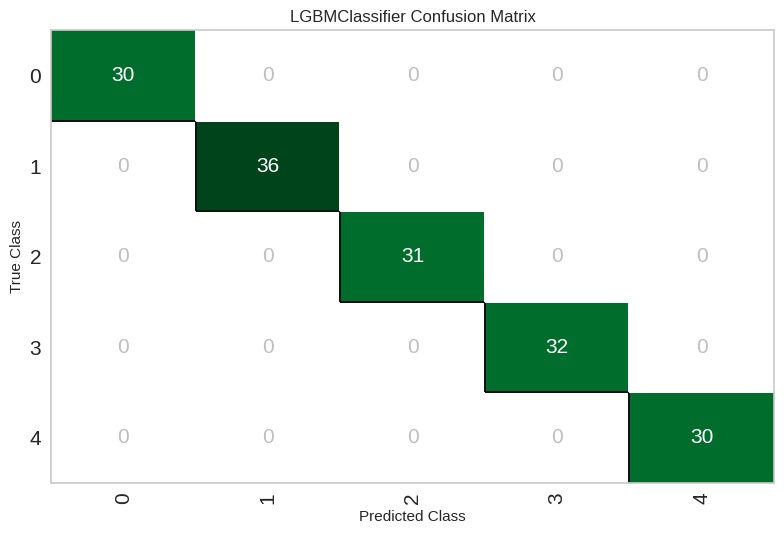

In [9]:
#Matriz de confusão do modelo

plot_model(best, plot = 'confusion_matrix')

#Rede Neural

Além da criação e comparação dos modelos de machine learning também criamos uma rede convolucional treinada apartir dos dados recebidos do esp32

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df2.drop('local', axis=1), df2['local'], test_size=0.1)

x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16)

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Teste de perda: {loss:.4f}')
print(f'Teste de precisão: {accuracy:.4f}')

Epoch 1/100
30/30 [==============================] - 2s 18ms/step - loss: 54.0033 - accuracy: 0.7526 - val_loss: 22.4851 - val_accuracy: 0.9245
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 4.7847 - accuracy: 0.9329 - val_loss: 13.9346 - val_accuracy: 0.9623
Epoch 3/100
30/30 [==============================] - 0s 6ms/step - loss: 1.9454 - accuracy: 0.9769 - val_loss: 14.3022 - val_accuracy: 0.9623
Epoch 4/100
30/30 [==============================] - 0s 6ms/step - loss: 1.9488 - accuracy: 0.9665 - val_loss: 14.6346 - val_accuracy: 0.9623
Epoch 5/100
30/30 [==============================] - 0s 6ms/step - loss: 2.5400 - accuracy: 0.9560 - val_loss: 12.6193 - val_accuracy: 0.9623
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 1.7698 - accuracy: 0.9811 - val_loss: 13.4585 - val_accuracy: 0.9811
Epoch 7/100
30/30 [==============================] - 0s 6ms/step - loss: 1.9299 - accuracy: 0.9686 - val_loss: 12.6961 - val_accuracy: 0.9811
Epoc